In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#using historical data due to deprecation of pandas data reader
#2012 - 2017
import datetime

In [5]:
tesla = pd.read_csv('stock_data/Tesla_Stock.csv',index_col='Date',parse_dates=True)
ford =pd.read_csv('stock_data/Ford_Stock.csv',index_col='Date',parse_dates=True)
gm = pd.read_csv('stock_data/GM_Stock.csv',index_col='Date',parse_dates=True)

In [6]:
gm.head(),ford.head(),gm.head()

(             Open   High    Low  Close    Volume
 Date                                            
 2012-01-03  20.83  21.18  20.75  21.05   9321420
 2012-01-04  21.05  21.37  20.75  21.15   7856752
 2012-01-05  21.10  22.29  20.96  22.17  17884040
 2012-01-06  22.26  23.03  22.24  22.92  18234608
 2012-01-09  23.20  23.43  22.70  22.84  12091714,
              Open   High    Low  Close    Volume
 Date                                            
 2012-01-03  11.00  11.25  10.99  11.13  45709811
 2012-01-04  11.15  11.53  11.07  11.30  79725188
 2012-01-05  11.33  11.63  11.24  11.59  67877467
 2012-01-06  11.74  11.80  11.52  11.71  59840605
 2012-01-09  11.83  11.95  11.70  11.80  53981467,
              Open   High    Low  Close    Volume
 Date                                            
 2012-01-03  20.83  21.18  20.75  21.05   9321420
 2012-01-04  21.05  21.37  20.75  21.15   7856752
 2012-01-05  21.10  22.29  20.96  22.17  17884040
 2012-01-06  22.26  23.03  22.24  22.92  1823460

In [7]:
#good data frames; date is index column for time series analysis
gm.info()
#all other columsn are floats and int

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


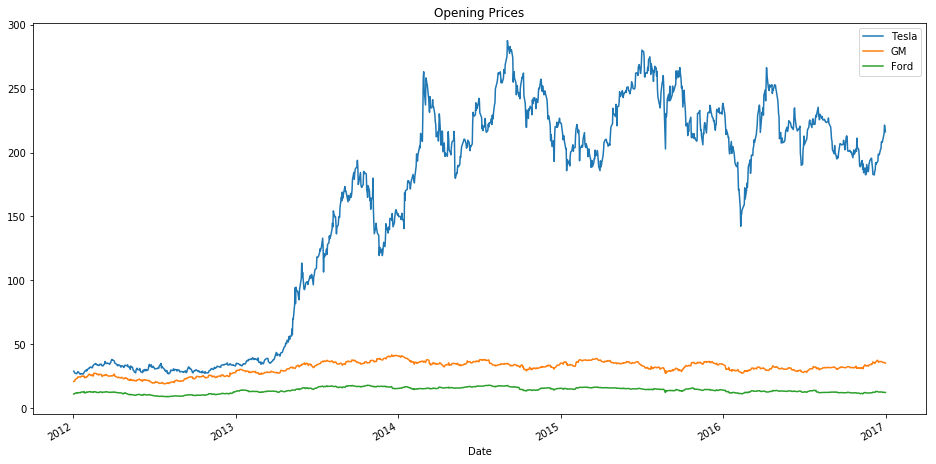

In [8]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

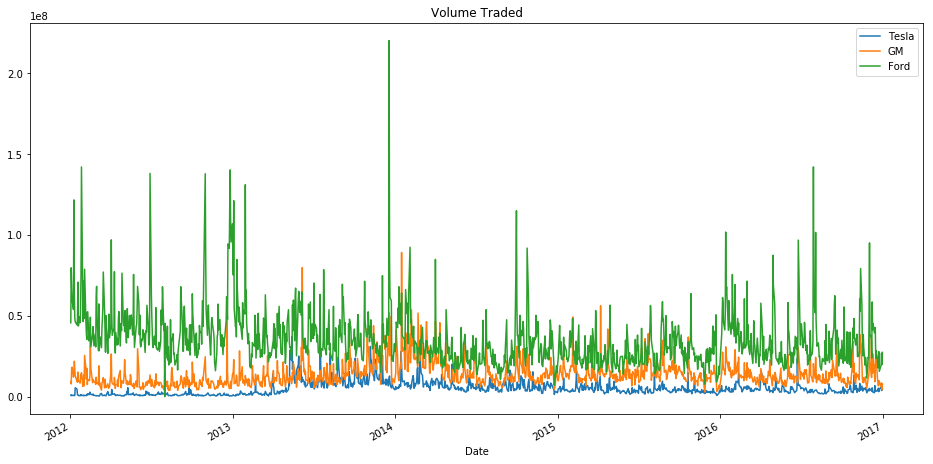

In [9]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

### Ford spike in Volume

*** they announced that aggressive push to launch new products next year would eat into profits 

In [10]:
ford['Volume'].idxmax()
#to find out exactly what day was peak volume

Timestamp('2013-12-18 00:00:00')

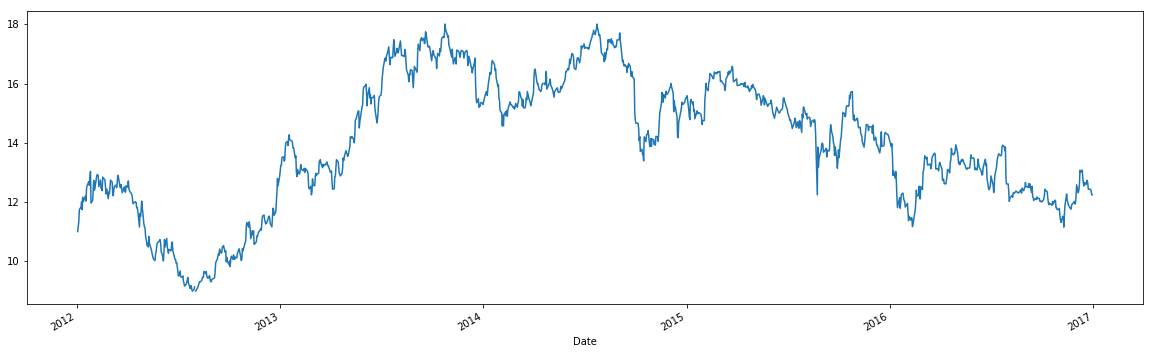

In [11]:
ford['Open'].plot(figsize=(20,6))

The open price of ford, when isolated is not as impacteful to price. 
The news was a shock to investors but the value was about $5 higher the next year.
the investments in new products seemed to have paid off


# Market Cap ~ 

Our data does not have outstanding stock data but we will analyze volume and value.
To estimate hoe much is being traded

In [12]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

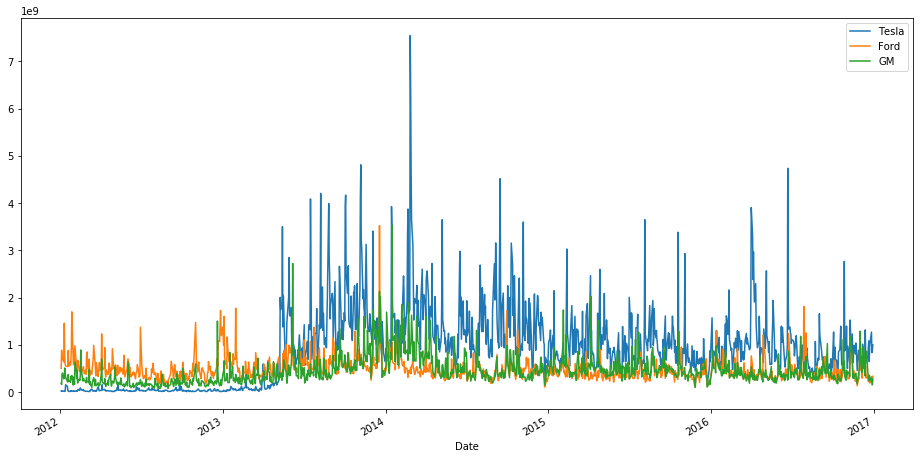

In [13]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend()

Morgan stanley report for the Tesla spike in trading on 2014-02-25.

In [14]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

### Looking at Tesla 30 moving averages on the close  price 

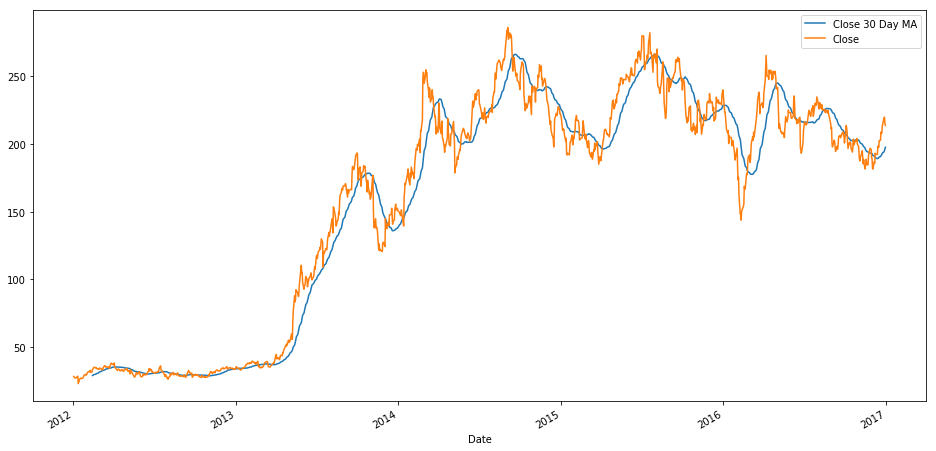

In [15]:
tesla['Close 30 Day MA'] = tesla['Close'].rolling(window=30).mean()
tesla[['Close 30 Day MA','Close']].plot(figsize=(16,8))

### Overlay gm moving average lines for 50 & 200 period

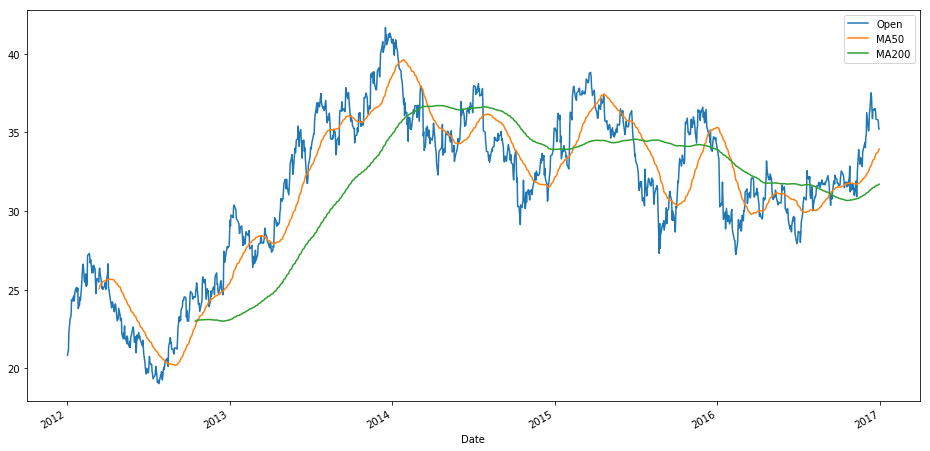

In [16]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']],axis=1)

In [19]:
car_comp.head()
#check conccatenated open columns

,Open,Open,Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [20]:
car_comp.columns= ['Tesla Open', 'GM Open', 'Ford Open']

In [21]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


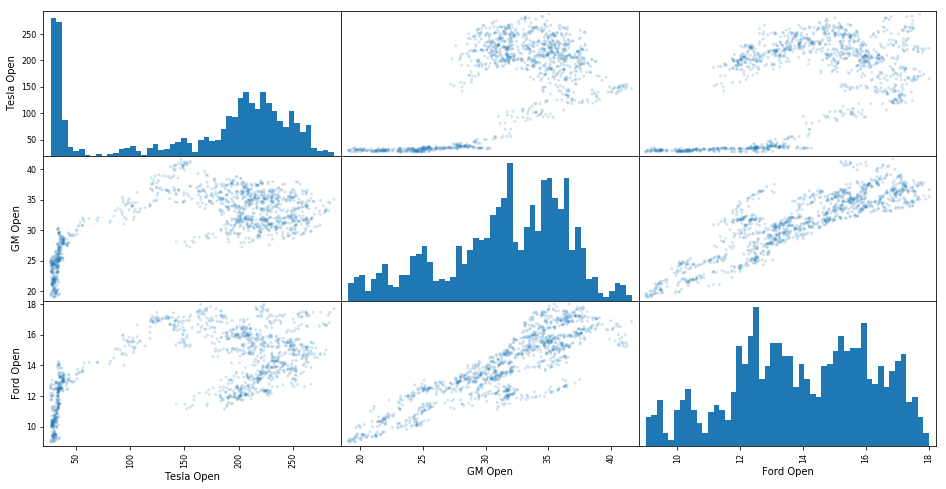

In [22]:
scatter_matrix(car_comp,figsize=(16,8),alpha=0.2,hist_kwds={'bins':50});

# Candle stick charts 

In [23]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [24]:
ford_reset = ford.loc['2012-01'].reset_index()

In [25]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [26]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,734511.0


In [27]:
list_of_cols = ['date_ax','Open','High', 'Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [28]:
ford_values

[(734505.0, 11.0, 11.25, 10.99, 11.13),
 (734506.0, 11.15, 11.53, 11.07, 11.3),
 (734507.0, 11.33, 11.63, 11.24, 11.59),
 (734508.0, 11.74, 11.8, 11.52, 11.71),
 (734511.0, 11.83, 11.95, 11.7, 11.8),
 (734512.0, 12.0, 12.05, 11.63, 11.8),
 (734513.0, 11.74, 12.18, 11.65, 12.07),
 (734514.0, 12.16, 12.18, 11.89, 12.14),
 (734515.0, 12.01, 12.08, 11.84, 12.04),
 (734519.0, 12.2, 12.26, 11.96, 12.02),
 (734520.0, 12.03, 12.37, 12.0, 12.34),
 (734521.0, 12.48, 12.72, 12.43, 12.61),
 (734522.0, 12.55, 12.64, 12.45, 12.59),
 (734525.0, 12.69, 12.84, 12.55, 12.66),
 (734526.0, 12.56, 12.86, 12.46, 12.82),
 (734527.0, 12.8, 12.98, 12.7, 12.93),
 (734528.0, 13.03, 13.05, 12.66, 12.79),
 (734529.0, 11.96, 12.53, 11.79, 12.21),
 (734532.0, 12.06, 12.44, 12.0, 12.29),
 (734533.0, 12.47, 12.51, 12.2, 12.42)]

In [29]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

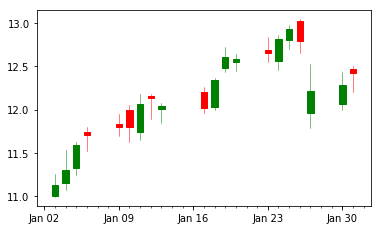

In [30]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, ford_values, width=0.6,colorup='g',colordown='r');

# Daily Percent change 

$r_t = \frac{p_t}{p_{t-1}} -1$


In [32]:
#tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1
# or 
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

## Histogram, Box plots and Kernel Density Distribution plots for volatility analysis

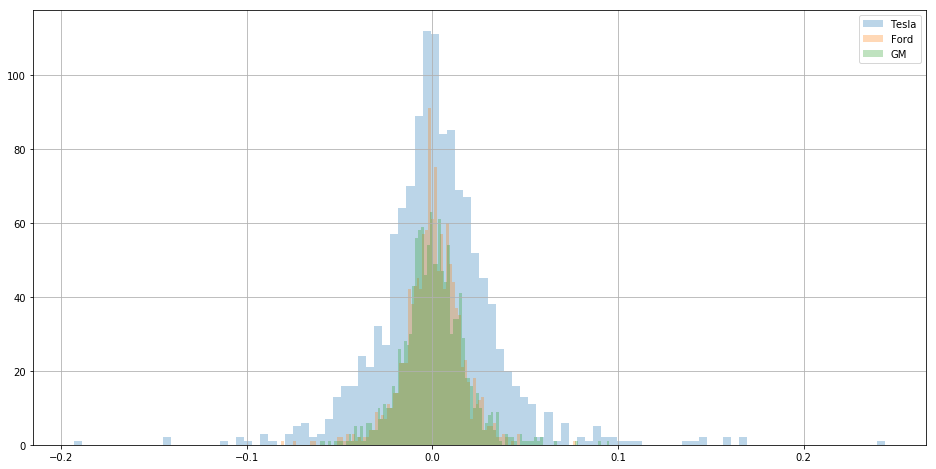

In [47]:
tesla['returns'].hist(bins=100,label='Tesla',alpha=0.3,figsize=(16,8))
ford['returns'].hist(bins=100,label='Ford',alpha=0.3)
gm['returns'].hist(bins=100,label='GM',alpha=0.3)
plt.legend();

Tesla has significanlty more volatility than GM and Ford on their daily percent change.

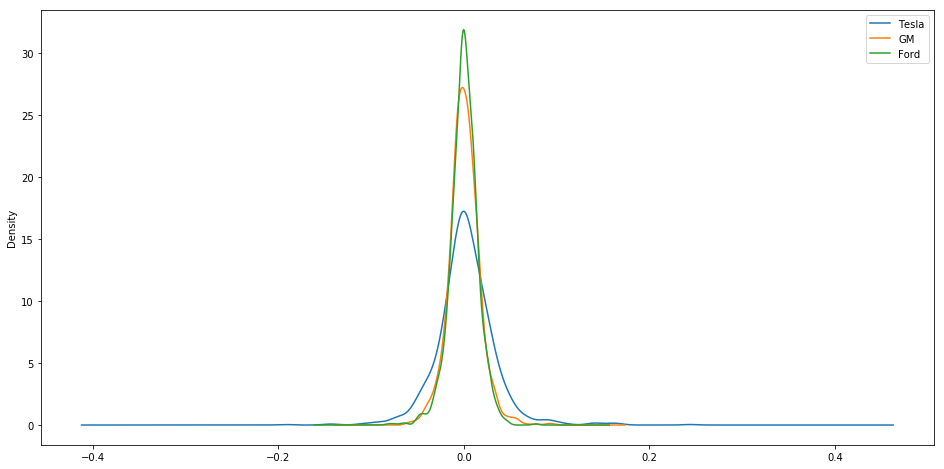

In [51]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(16,8))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend();

ford has highest KDE means its price is more stable than gm and tesla

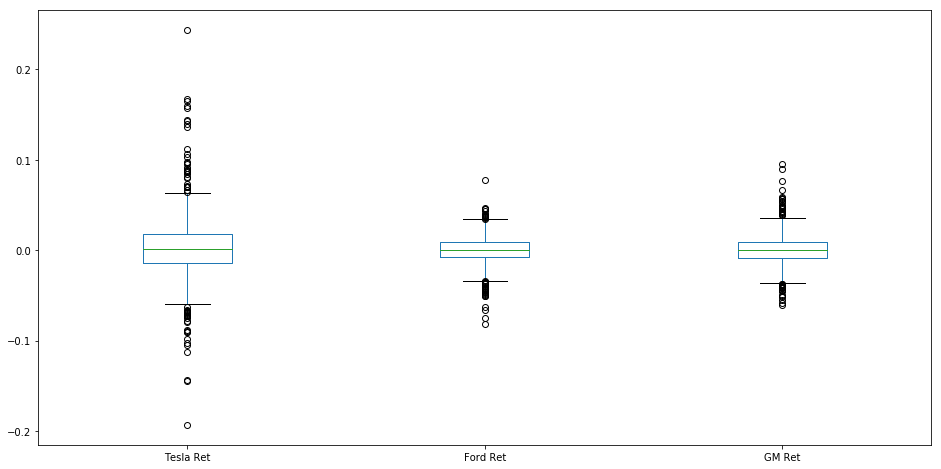

In [54]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret','Ford Ret', 'GM Ret']
box_df.plot(kind='box',figsize=(16,8))


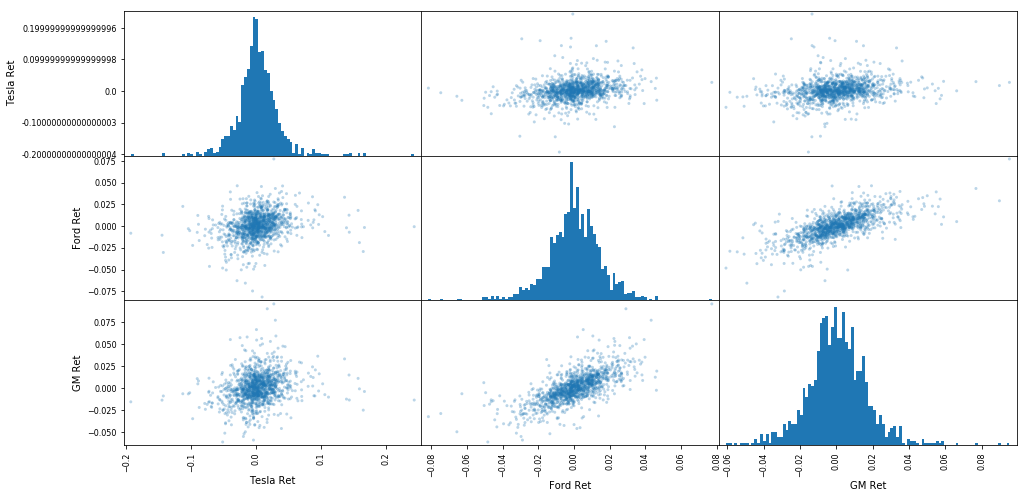

In [58]:
scatter_matrix(box_df,figsize=(16,8),alpha=0.3,hist_kwds={'bins':100});

## The Scatter plot shows that gm and ford are more tightly correlated with eachother. Included is a scatter plot to show that linear relationship

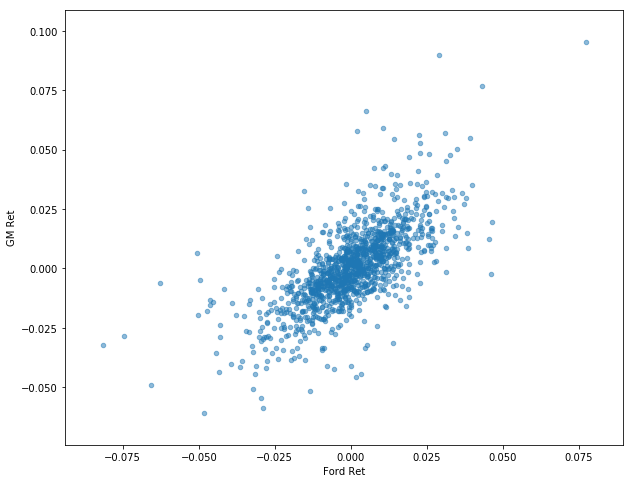

In [63]:
box_df.plot(kind='scatter',x='Ford Ret', y='GM Ret',alpha=0.5,figsize=(10,8));

# Cumulative Daily Returns

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

* It is used to track investements from a given entry point
* df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [67]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

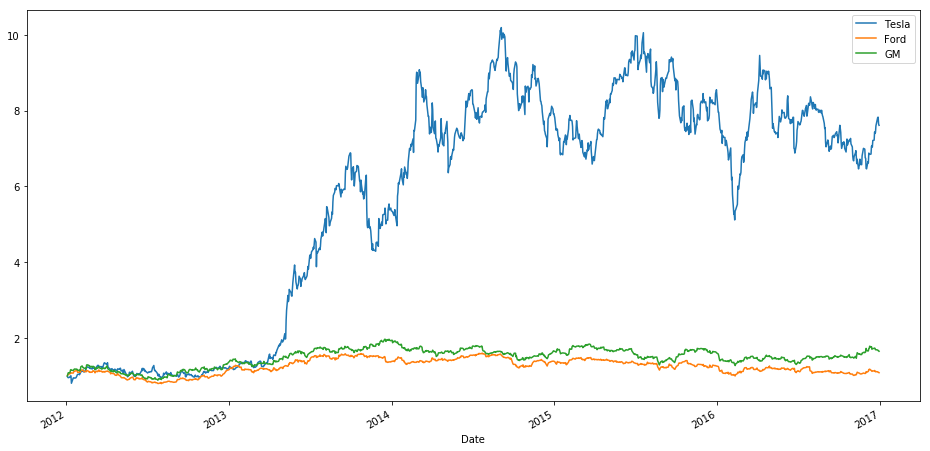

In [71]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();

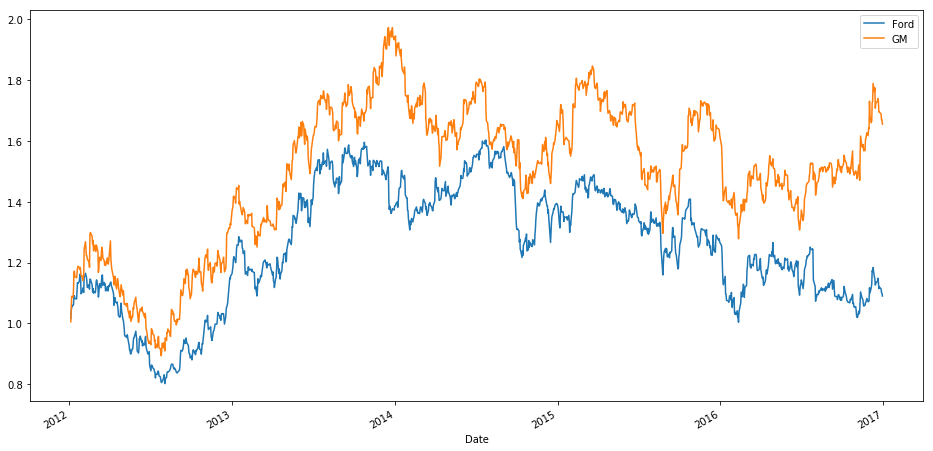

In [73]:
ford['Cumulative Return'].plot(label='Ford',figsize=(16,8))
gm['Cumulative Return'].plot(label='GM')
plt.legend();